In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.optimize import curve_fit
import seaborn as sns
import itertools
import copy
import warnings
warnings.filterwarnings("ignore")

#visualisation
import datetime
import time
from __future__ import division
from matplotlib import pyplot as plt
import matplotlib.animation as animation
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from celluloid import Camera #need to be installed

In [ ]:
def euc_dist(point1, point2):

  '''takes two rows related to two different sismic events, 
  extract the coordinates and return the 3D euclidean distance'''

  x1, y1, z1 = point1['X'], point1['Y'], point1['Z']
  x2, y2, z2 = point2['X'], point2['Y'], point2['Z']

  euclidean_dist = np.sqrt((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)
  return euclidean_dist

def inter_time(point1, point2):

  '''takes two rows related to two different sismic events, 
  extract the times and return the interarrival time'''

  x1, x2 = point1['TIME'], point2['TIME']

  time_dist = x2-x1
  return time_dist


def power_law(x, a, b):

    '''power law function'''
    
    return a * np.power(x, -b)

# <center> **Earthquake Data Analysis**

<center> Manuilova Nadezhda (2049581), Shofi Alfi Baqiatus (2041377), Soccol Laura (1236659), Vignaga Marco (2053043)  
<center> Padova, 22/02/2022 


# <center> **Table of contents** <a class="anchor" id="0"></a>
1. Introduction
2. Dataset description 
3. Visualization <br>
    3.1 Visualization in space <br> 
    3.2 Visualization in time
4. Distribution of waiting time $P_m(t)$ <br>
    4.1 Histogram visualization <br>
    4.2 Curve fitting
5. Distribution of distances $P_m(r)$ <br>
    5.1 Histogram visualization <br>
    5.2 Logaritmic binning in log-log scale<br>
    5.3 Fitting logaritmic binned data
6. Distribution of waiting time for events separated by a given distance $P_{m,R}(t)$ <br>
    6.1 Histogram visualization for consecutive events <br>
    6.2 Histogram visualization for triggered events

7. Scaling law evaluation <br>
    7.1 Rescaling $P_m(t)$<br>
    7.2 Rescaling $P_m(r)$<br>
    7.3 Rescaling $P_{m,R}(t)$






# <center> Introduction

* South California is known for its earthquakes. They are mainly caused by the movement movement of huge blocks of the earth's crust: the Pacific and North American plates. The Pacific plate is moving northwest, scraping horizontally the North America one. <br><br>
* About two-thirds of this movement occurs on the San Andreas fault and some parallel faults like the San Jacinto, Elsinore, and Imperial faults, which determine about half of the significant earthquakes of this region, as well as many minor events. <br> <br>

* Te aim of our project is to analyzed the dataset through: <br>
    * Visual inspection of the earthquakes, both in time and space, <br>
    * Computation of the distribution in time for different values of magnitudes $m$, <br>
    * Computation of the distribution in space for different values of magnitudes $m$, <br>
    * Computation of the distribution in time and space for different values of magnitudes $m$ and distances $R$, <br>
    * Evaluation of a rescaling factor to asses if the distribution for different values of $m$ and $R$ collapse on the same one.






# <center> Dataset description
* The dataset `SouthCalifornia-1982-2011.dat` is a catalogue of 110271 earthquakes, taken from about 20 years seismic activity from the $1^{st}$ January 1982 to $28^{th}$ June 2011.


* The data file has the following columns: <br>
    * INDEX: index of the event, <br>
    * PREVIOUS: index of the previous vent that triggered the current one (-1 if no ancestor is found), <br>
    * TIME: from 0:00 of Jan 1st 1982, in seconds (s), <br>
    * MAGNITUDE: magnitude of the event (range [0,8]) 
    * X: latitude of the hypocenter in meters (m), <br>
    * Y: longitude of the hypocenter in meters (m), <br>
    * Z: depth of the hypocenter in meters (m). <br>
    X, Y and Z columns defines the 3D coordinates (in meters) of the earthquake hypocenter, i.e. of the point from where it started. <br>

* The considered variables are: <br>
    * waiting time (t): time interval between an event and the next one in the sequence, <br>
    * distance (r): euclidean 3D distance between events between hypocenters. 



In [ ]:
# load the file
file_name = 'SouthCalifornia-1982-2011.dat'
data = pd.read_csv(file_name, sep=' ', names=['INDEX', 'PREVIOUS', 'TIME', 'MAGNITUDE', 'X', 'Y', 'Z'], header=None)
data.head()


,INDEX,PREVIOUS,TIME,MAGNITUDE,X,Y,Z
0,0,-1,0.00000,2.71,-2571956,-4627162,3520602
1,1,0,36501.39072,2.12,-2363740,-4787011,3461373
2,2,0,37488.27744,2.33,-2363746,-4786942,3461232
3,3,0,47982.51648,2.57,-2475085,-4664024,3548479
4,4,0,60268.57056,2.98,-2238642,-4839098,3469546


# <center> 1 -  Visualization

## <center> 1.1 - Visualisation in Space

In this part we visualize the series of the events space. The X, Y and Z coordinates are used to represent how the events are located in space, without taken into consideration the time. First of all, we visualise the Magnitude of the earthquake in space. The darker color represents the bigger magnitude. The distribution is sparse because every location might have probability to have earthquake.

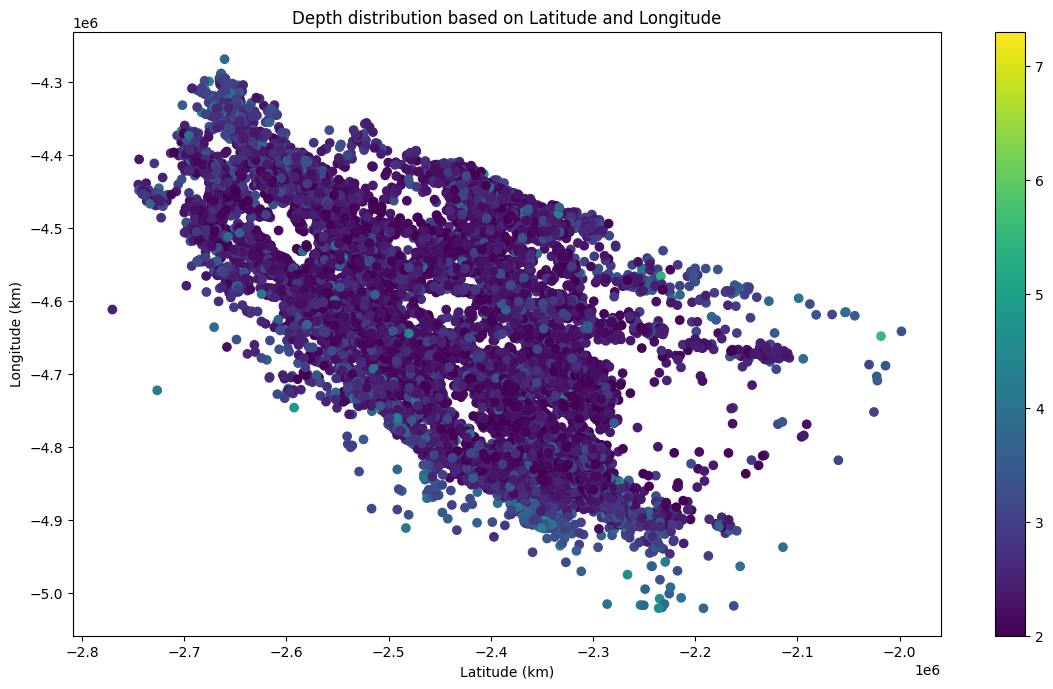

In [ ]:
#converting data series to list using tolist()
latitude = data['X'].tolist()
longitude = data['Y'].tolist()
depth = data['Z'].tolist()
magnitude = data['MAGNITUDE'].tolist()

#to set the plot size
plt.figure(figsize=(14, 8), dpi=100)

#to set the plot contents
plt.scatter(x = latitude, y = longitude, c = magnitude, marker = 'o')
plt.colorbar()
plt.title('Depth distribution based on Latitude and Longitude')
plt.xlabel('Latitude (km)')
plt.ylabel('Longitude (km)')

plt.show()

Secondly, we visualise the Depth of earthquake in space. As we can see on the plot that the darker color represents the lower of the depth. The south areas mostly have lower depth compared to the north areas.

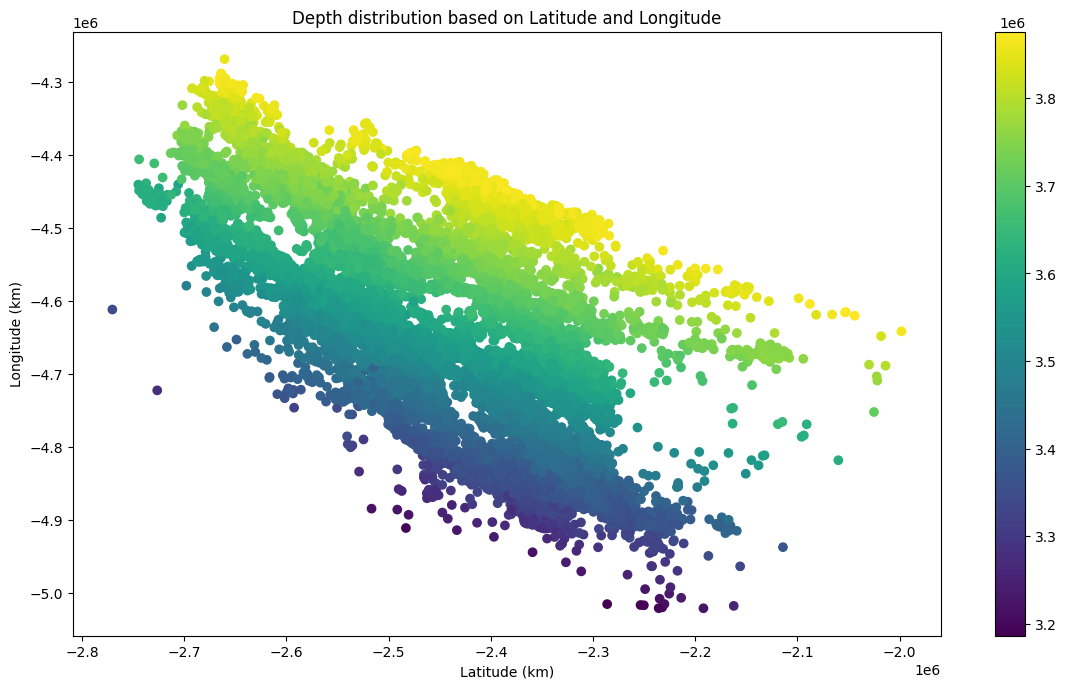

In [ ]:
#to set the plot size
plt.figure(figsize=(14, 8), dpi=100)

#to set the plot contents
plt.scatter(latitude, longitude, c = depth, marker = 'o')
plt.colorbar()

plt.xlabel('Latitude (km)')
plt.ylabel('Longitude (km)')
plt.title('Depth distribution based on Latitude and Longitude')

plt.show()

## <center> 1.2 - Visualisation in Time

Then we visualize Magnitude also considering time. Time is represented on the x axis while on the y axis is Magnitude. First, we add new data for the dataseries.

In [ ]:
# calculating the offset so we only display the year from 1980 without the year before
# because Python shows the year starts from 1970
offset = (datetime.datetime.fromisoformat('1982-01-01') - datetime.datetime.fromisoformat('1970-01-01')).total_seconds() 

# add the time with offset included
data['total_second'] = data['TIME'] + offset 

# creating new col for the year by adding col based on shape of the data and make it empty,
# so later, the value of the year will be filled into this col following values in int type of data
y = np.empty(data['TIME'].values.shape[0], int) #year
m = np.empty(data['TIME'].values.shape[0], int) #month

# inputting the year value
for i in range(data['TIME'].values.shape[0]):
    y[i] = datetime.datetime.fromtimestamp( data['total_second'].values[i] ).year 

# inputting the month value
for i in range(data['TIME'].values.shape[0]):
    m[i] = datetime.datetime.fromtimestamp( data['total_second'].values[i] ).month 

# creating new col with new value
data['year'] = y
data['month'] = m

This is showing the new columns of year and month

In [ ]:
# printing new data
data

,INDEX,PREVIOUS,TIME,MAGNITUDE,X,Y,Z,total_second,year,month
0,0,-1,0.000000e+00,2.71,-2571956,-4627162,3520602,3.786912e+08,1982,1
1,1,0,3.650139e+04,2.12,-2363740,-4787011,3461373,3.787277e+08,1982,1
2,2,0,3.748828e+04,2.33,-2363746,-4786942,3461232,3.787287e+08,1982,1
3,3,0,4.798252e+04,2.57,-2475085,-4664024,3548479,3.787392e+08,1982,1
4,4,0,6.026857e+04,2.98,-2238642,-4839098,3469546,3.787515e+08,1982,1
...,...,...,...,...,...,...,...,...,...,...
110266,110266,-1,9.304996e+08,2.60,-2668492,-4335735,3810743,1.309191e+09,2011,6
110267,110267,-1,9.305115e+08,2.02,-2297480,-4823870,3445285,1.309203e+09,2011,6
110268,110268,-1,9.305318e+08,2.00,-2404797,-4441247,3868121,1.309223e+09,2011,6
110269,110269,-1,9.305363e+08,2.17,-2388375,-4691191,3550903,1.309227e+09,2011,6


### <center> The Change of Magnitude Over Time


To see the change of Magnitude every year

In [ ]:
# Fix the years and month of start and the end
START_YEAR = 1982
END_YEAR = 2011
START_MONTH = 1
END_MONTH = 12

# Setting the range of year for the slider
m_max = data['MAGNITUDE'].max()
m_min = data['MAGNITUDE'].min()
points_slider = data[data['year']==START_YEAR] # Filter the dataframe for the starting year
 
# Select the longitude and magnitude column
xs, ys = list(points_slider['month']), list(points_slider['MAGNITUDE'])
plt.close()

df_slider = data

# Update the plot for the selected year
def update(year_slider): 
    plt.figure(figsize=(10, 8))
    plt.ylim((m_min-0.1,m_max+0.1))
    plt.xlim(0,13)
    plt.xticks([i for i in range(1,13)])
    current_year = year_slider
    points_slider = df_slider[df_slider['year']==current_year]
    x_slider, y_slider = list(points_slider['month']), list(points_slider['MAGNITUDE'])
    plt.title("Magnitude earthquake visualisation ("+str(START_YEAR)+'-'+str(END_YEAR)+')', fontsize=20)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Magnitude (km)', fontsize=14)
    plt.plot(x_slider,y_slider,'.',color='red')
    

anim = interact(update, year_slider = widgets.IntSlider(value=1992, min=START_YEAR, max=END_YEAR, step=1));

plt.show()

interactive(children=(IntSlider(value=1992, description='year_slider', max=2011, min=1982), Output()), _dom_cl…

### <center> The Change of Depth Over Time

To see the change of Depth every year

In [ ]:
# Fix the years and month of start and end
START_YEAR = 1982
END_YEAR = 2011
START_MONTH = 1
END_MONTH = 12

# Setting the range of year for the slider
m_max = data['Z'].max()
m_min = data['Z'].min()
points_slider = data[data['year']==START_YEAR] # Filter the dataframe for the starting year
 
# Select the longitude and magnitude column
xs, ys = list(points_slider['month']), list(points_slider['Z'])
plt.close()

df_slider = data

# Update the plot for the selected year
def update(year_slider): 
    plt.figure(figsize=(10, 8))
    plt.ylim((m_min-0.1,m_max+0.1))
    plt.xlim(0,13)
    plt.xticks([i for i in range(1,13)])
    current_year = year_slider
    points_slider = df_slider[df_slider['year']==current_year]
    x_slider, y_slider = list(points_slider['month']), list(points_slider['Z'])
    plt.title("Depth earthquake visualisation ("+str(START_YEAR)+'-'+str(END_YEAR)+')', fontsize=20)
    plt.xlabel('Month', fontsize=14)
    plt.ylabel('Depth (km)', fontsize=14)
    plt.plot(x_slider,y_slider,'.',color='blue')
    

anim = interact(update, year_slider = widgets.IntSlider(value=1992, min=START_YEAR, max=END_YEAR, step=1));

plt.show()

interactive(children=(IntSlider(value=1992, description='year_slider', max=2011, min=1982), Output()), _dom_cl…

### <center> Animation of Depth based on Magnitude distribution area over time



MovieWriter PillowWriter unavailable; using Pillow instead.


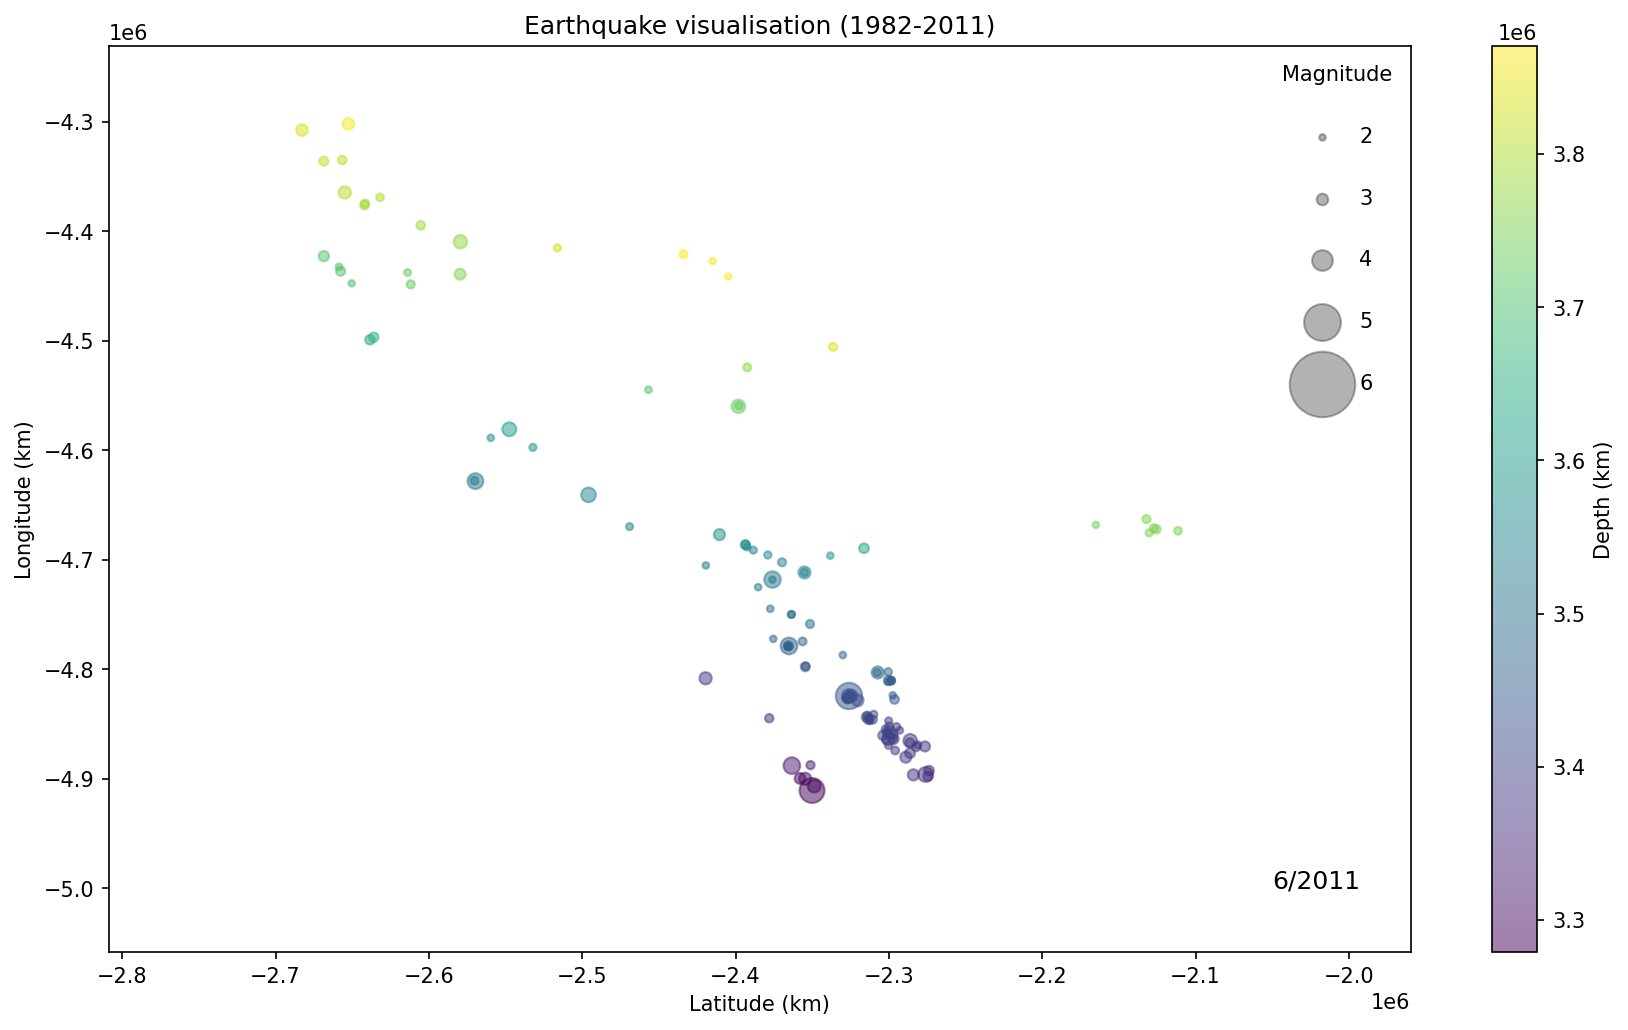

In [ ]:
# Creating figure for animation
fig = plt.figure(figsize = (14,8), dpi=150)
camera = Camera(fig)
index = 0


AXIS_SCALING = 1e6

# Create title of the plot
plt.title("Earthquake visualisation ("+str(START_YEAR)+'-'+str(END_YEAR)+')')

# set labels
plt.xlabel("Latitude (km)")
plt.ylabel("Longitude (km)")

# Fix the years and month of start and end of the animation
START_YEAR = 1982
END_YEAR = 2011
START_MONTH = 1
END_MONTH = 12

# Setting the first frame
# Filter the dataframe for the starting year and month
# Computing the value for each x and y axis from the data in loop then later display it on frame
last_index = data.last_valid_index();
while True:
    if index > last_index:
        break
    first_in_frame = data.iloc[index]
    x = []
    y = []
    magnitudes = []
    depth = []

    # gets data for current frame
    while True:
        current_frame = data.iloc[index]
        x.append(current_frame['X'])
        y.append(current_frame['Y'])
        depth.append(current_frame['Z'])
        # increase size to be ploted 
        magnitudes.append(1.15 * current_frame['MAGNITUDE'])

        index = index + 1;
        if index > last_index:
            plt.scatter(x, y)
            camera.snap()
            break

        if (current_frame['year'] != first_in_frame['year'] 
                or current_frame['month'] != first_in_frame['month']):
            break
    
    # Create the scatter plot, where the magntitude scales as the radius and the depth as the color 
    plt.scatter(x, y, c = depth, s = np.exp(magnitudes), alpha = 0.5)
    
    # Creating attributes for the year
    plt.text(-2.05 * AXIS_SCALING, -5 * AXIS_SCALING, 
                s = str(int(first_in_frame['month']))+'/'+str(int(first_in_frame['year'])), 
                fontsize=12, 
                color='black') #month and year of the frame

    camera.snap()

# # Colorbar design
# # has to be at the end, when we have the data in the plot
cbar = plt.colorbar()
cbar.set_label("Depth (km)")

# Create legend of the magntitude
for magn in [2, 3, 4, 5, 6]:
    plt.scatter([], [], c='black', alpha=0.3, s=np.exp(1.15*magn), label=str(magn))   
leg = plt.legend(scatterpoints=1, frameon=False, labelspacing=2, title='Magnitude', loc = 'upper right')
plt.setp(leg.get_title(), color='black', fontsize=10)
plt.setp(leg.get_texts(), color='black')

# Animate the plot and save it in gif g
animation = camera.animate()
animation.save('Earthquake_Visualisation.gif', writer='PillowWriter', fps=1)


# <center> 2 - Distribution of waiting time $P_m(t)$
In this part we compute the  distribution of waiting time for earthquakes based on the magnitudes value with $m$ $\in$ [2,5]. For each $m$ we considered events of magnituses m or above. <br>
We consider events for a fixed given subset of eqrthquakes based on $m$ we compute the waiting time as the difference between subsequent couple of events.  

### <center> Histogram visualization

In [ ]:
file_name = 'SouthCalifornia-1982-2011.dat'
data = pd.read_csv(file_name, sep=' ', names=['INDEX', 'PREVIOUS', 'TIME', 'MAGNITUDE', 'X', 'Y', 'Z'], header=None)

# add a column to compute the differences between couple of subsequent events
data['inter_time'] = np.abs(data['TIME'].diff(periods=-1))

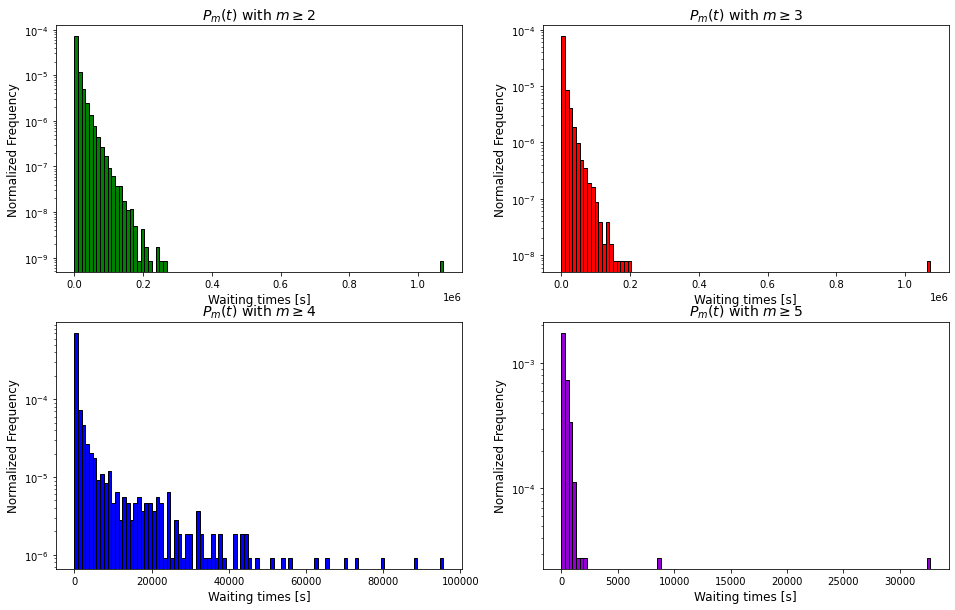

In [ ]:
# histogram with regular binning
colors = itertools.cycle(('green', 'red', 'blue', 'darkviolet'))
magnitudes = np.arange(2,6)

fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(16,10))
for i, j, m in list([[0,0,2],[0,1,3],[1,0,4],[1,1,5]]):

  # extract all the events of magnitude mag
  data_magm = data.loc[data['MAGNITUDE'] >= m]

  axe = sns.distplot(data_magm['inter_time'], bins = 100, kde=False, norm_hist=True, ax=ax[i,j], hist_kws={'color': next(colors), 'alpha': 1, 'edgecolor' : 'black'})
  ax[i,j].set_title('$P_{m}(t)$ with $m \geq$' + str(m), fontsize = 14)
  ax[i,j].set_xlabel('Waiting times [s]', fontsize = 12)
  ax[i,j].set_ylabel('Normalized Frequency', fontsize = 12)
  ax[i,j].set_yscale('log')  

***Power Law Distribution***

Watining time obeys some statistical general law that are likely to encounter when dealing with empirical temporal data. The shape of waiting time distribution follows a power law, as expected:

$$ P(t) = C t^{- \alpha} $$

A power law distribution is visualized as a straight line on a log-log plot:

$$ \ln P(t) = \ln C - \alpha \ln t $$

### <center> Fitting of the curve

Now we want to fit the curve using the log-log plot with logarithmic binning

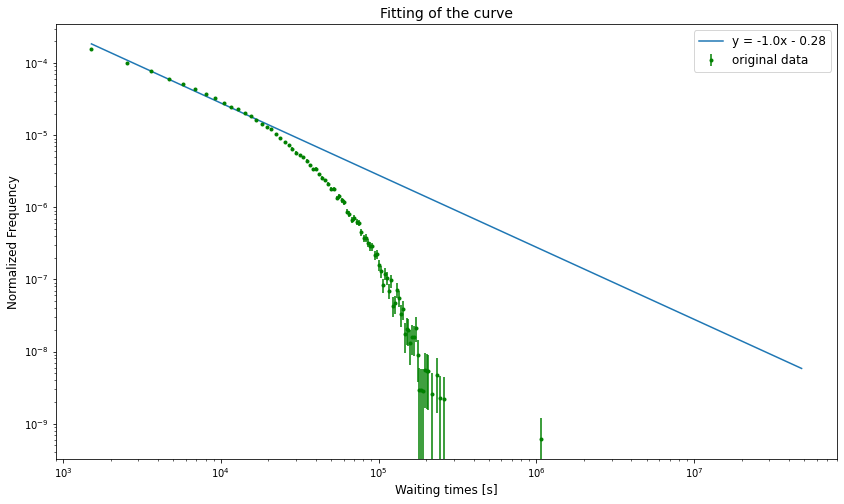

In [ ]:
# Logaritmic binning for magnitude 2 events
data_mag =  data.loc[data['MAGNITUDE'] >= 2]
width = 1000*np.logspace(0, 3, int(np.sqrt(data_mag.shape[0]))+1)
edge = np.cumsum(width) 

# bins and frequency computation
ax1 = sns.distplot(data['inter_time'], bins=edge, kde=False) # Non-normalized plot used to compute errors
plt.close()
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.distplot(data['inter_time'], bins=edge, color='g', kde=False, norm_hist=True) # Plot a normalized histogram
plt.close()

width1 = np.array([h.get_width() for h in ax1.patches])
y1 = np.array([h.get_height() for h in ax1.patches])
y_error = np.divide(np.sqrt(y1),np.sum(y1)*width1)

width = np.array([h.get_width() for h in ax.patches]) 
edge = np.array([h.get_xy()[0] for h in ax.patches])
x = np.add(edge,width/2.)
y = [h.get_height() for h in ax.patches] 

# curve fitting
popt, pcov = curve_fit(power_law, x,y, p0=[1, 1], bounds=[[1e-3, 1e-3], [1,1]])

fig, ax = plt.subplots(figsize=(14,8))

ax.errorbar(x, y,yerr=y_error,fmt='.', color='g', label = 'original data')
ax.plot(x, power_law(x, *popt), label = f'y = -{round(popt[1],2)}x - {round(popt[0],2)}')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_title('Fitting of the curve', fontsize = 14)
ax.set_xlabel('Waiting times [s]', fontsize = 12)
ax.set_ylabel('Normalized Frequency', fontsize = 12)
ax.legend(fontsize= 12)
plt.show()

# <center> 3 - Distribution of distances $P_m(r)$
In this part we compute the  distances distribution for earthquakes of magnitude higher than $m$ with $m$ $\in$ [2,5]. <br>
The values are computed between subsequent events and refers to the euclidean distance between the x, y ,and z coordinates.

### <center> Histogram visualization

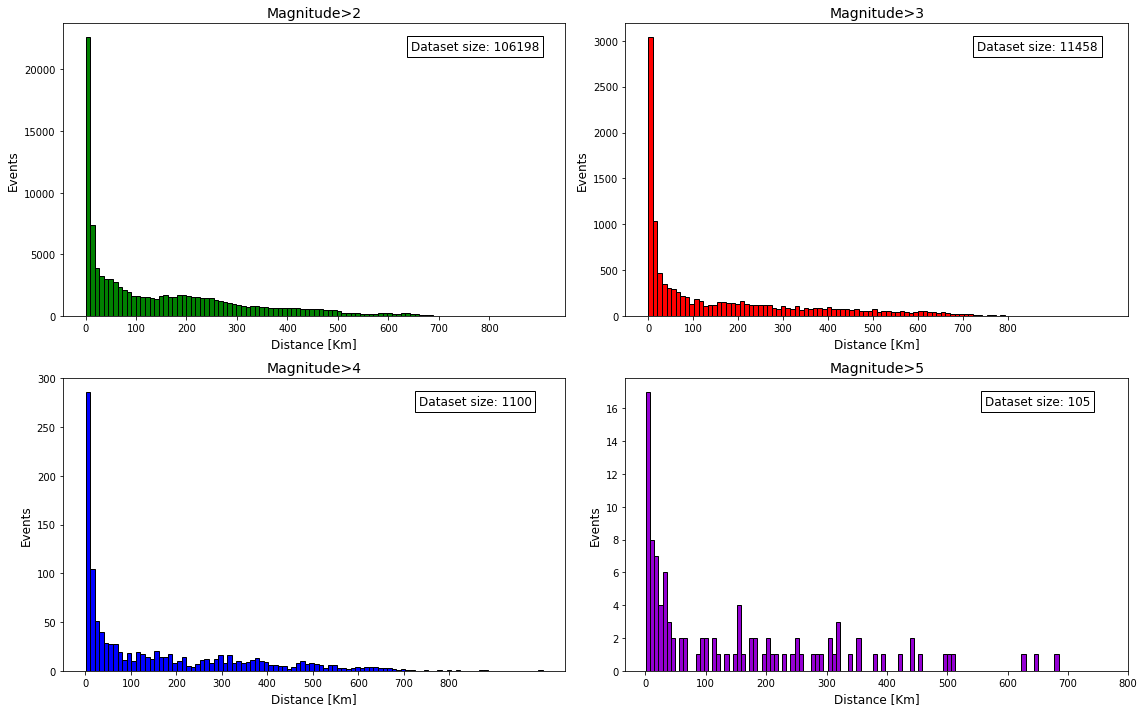

In [ ]:
colors = itertools.cycle(('green', 'red', 'blue', 'darkviolet'))

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16,10))
heights=[]
edges=[]
# for each magnitude in range (2,6)
for i, j, m in list([[0,0,2],[0,1,3],[1,0,4],[1,1,5]]):
  
  # extract all the events of magnitude > mag
  high_mag_earthqks = data.loc[data['MAGNITUDE']>m].loc[:,['X','Y','Z']].values.tolist()

  # From meters to Km
  high_mag_earthqks = [[x[0]/1000,x[1]/1000,x[2]/1000] for x in high_mag_earthqks]
  
  # calculate distances for subsequent events
  distances = [distance.euclidean(x[0],x[1]) for x in list(zip(high_mag_earthqks,high_mag_earthqks[1:]))]

  # plot the results
  h, bins, _ = axs[i,j].hist(distances, bins=100, density=False, cumulative=False, facecolor=next(colors), edgecolor = "k", log=False) # create and plot the histogram
  axs[i,j].set_title(f'Magnitude>{m}', fontsize = 14)
  axs[i,j].set_xlabel('Distance [Km]', fontsize = 12)
  axs[i,j].set_xticks([*list(np.arange(0,900,100))])
  axs[i,j].set_ylabel('Events', fontsize = 12)
  axs[i,j].text(0.82, 0.92, f'Dataset size: {len(high_mag_earthqks)}', fontsize = 12, bbox = dict(facecolor = 'white'), horizontalalignment='center', verticalalignment='center', transform=axs[i,j].transAxes)
  fig.tight_layout()

***Power Law Distribution***

As for the waiting times, distances seems to follow a power law distribution as well:

$$ f(t) = A*t^{- \alpha} $$

This behaviour is repeated at different levels of the dataset, so that even removing the majority of low magnitude data the property is maintained.

A power law distribution becomes linear on a log-log plot and thus it is often drawn in that scale, providing an easier visualization to study and fit:

$$ \ln f(t) = \ln A - \alpha \ln t $$

<Figure size 432x288 with 0 Axes>

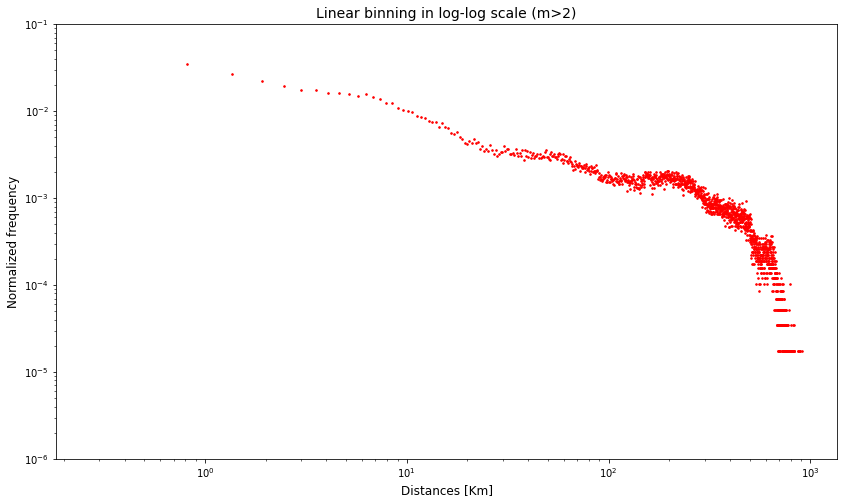

In [ ]:
# extract the desired magnitude events
m=2
high_mag_earthqks = data.loc[data['MAGNITUDE']>m].loc[:,['X','Y','Z']].values.tolist()

# convert from meters to Km
high_mag_earthqks = [[x[0]/1000,x[1]/1000,x[2]/1000] for x in high_mag_earthqks]

# calculate distances for subsequent events
distances = [distance.euclidean(x[0],x[1]) for x in list(zip(high_mag_earthqks,high_mag_earthqks[1:]))]

# compute the binning
h, bins, _ = plt.hist(distances, bins=5*int(np.sqrt(data.shape[0])), density=True, cumulative=False, log=False ) # create and plot the histogram
plt.clf()

# compute centers of bins
bin_ranges = list(zip(bins,bins[1:]))
centers = [x[1]-(x[1]-x[0])/2 for x in bin_ranges]
bin_size = bins[1]-bins[0]

# Plot the dataframe points with means and variances
plt.figure(figsize=(14,8))
plt.scatter(centers, h, marker='.', c='r', s=10)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-6,1e-1)
plt.title(f'Linear binning in log-log scale (m>{m})', fontsize = 14)
plt.xlabel('Distances [Km]', fontsize = 12)
plt.ylabel('Normalized frequency', fontsize = 12)
plt.show()

The slope of the line corresponds to the exponent **α** of the distribution but the presence of noise makes it difficult to estimate the parameters of the fit. <br>
This kind of noise is due to the low number of entries in the tail region (heavy-tail).

### <center> Logaritmic binning in log-log scale

In order to reduce the noise it is necessary to use a logarithmic binning. This technique is frequently used when dealing with power laws because it provides wider bins for bigger values in the x axis, grouping together more points.

<Figure size 432x288 with 0 Axes>

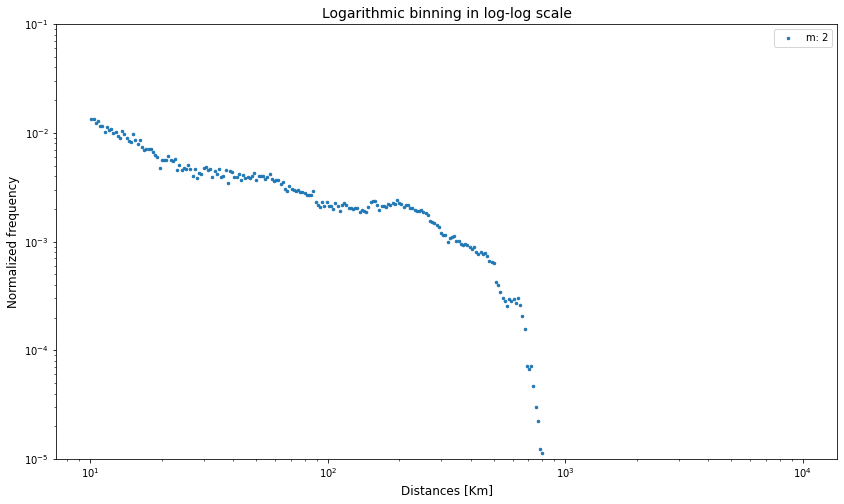

In [ ]:
# compute the logarithmic binning
h, bins, _ = plt.hist(distances, bins=10*np.logspace(0, 3, int(np.sqrt(len(distances)))), density=True, cumulative=False, log=False)  # bin_size = sqrt(N)  with  N = #events in the dataset
plt.clf()

# compute centers of bins
bin_ranges = list(zip(bins,bins[1:]))
center = [x[1]-(x[1]-x[0])/2 for x in bin_ranges]

# Plot binnings
fig, ax1 = plt.subplots(1, 1, figsize=(14,8))
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(1e-5,1e-1)
ax1.set_title(f'Logarithmic binning in log-log scale', fontsize = 14)
ax1.set_xlabel('Distances [Km]', fontsize = 12)
ax1.set_ylabel('Normalized frequency', fontsize = 12)
ax1.scatter(center, h, marker='.', label=f'm: {m}', s=25)

ax1.legend()

### <center> Fitting logarithmic binned data

Number of bins = 324
Number of non-empty bins = 192

Fitted line: f(x) = -0.68*x-1.28




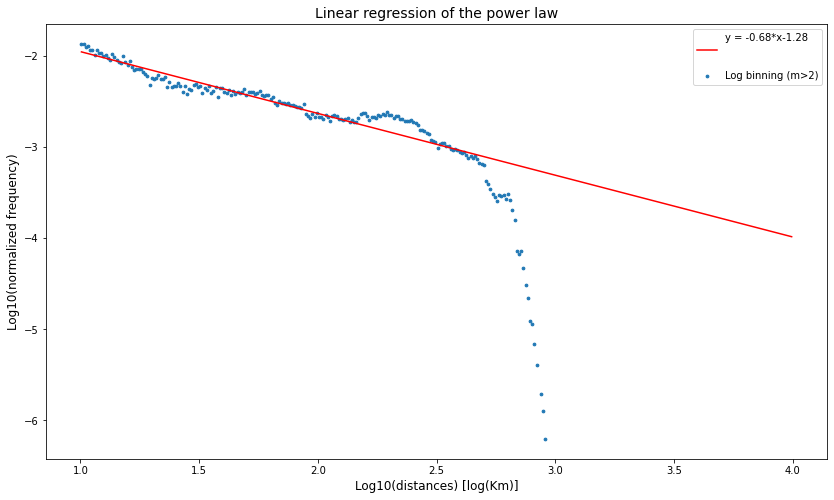

In [ ]:
# Extract the desired magnitude events and compute binning
m=2

# compute centers of bins and widths
bin_ranges = list(zip(bins,bins[1:]))
centers = [x[1]-(x[1]-x[0])/2 for x in bin_ranges]

print("Number of bins =", len(centers))

# filter insteresting values (remove empty bins or values in the tail of the distribution)
xmin=1e1
xmax=6*1e2
filtered_h = [np.log10(b) for a,b in zip(centers,h) if (a>xmin and a<xmax) and b!=0]     
filtered_centers = [np.log10(a) for a,b in zip(centers,h) if (a>xmin and a<xmax) and b!=0]
print("Number of non-empty bins =", len(filtered_centers))


# apply logarithm of x ,y terms
centers = np.log10(centers)
h = np.log10(h)

# fit a line
def f(x, intercept, slope):
  return intercept + (slope*np.array(x))

opt, cov = curve_fit(f, filtered_centers, filtered_h, p0=[10,-1], full_output=False)
print('\nFitted line: f(x) = %.2f*x%.2f\n\n'%(opt[1], opt[0]))

# plot result
plt.figure(figsize=(14,8))     
plt.title(f'Linear regression of the power law', fontsize = 14)
plt.xlabel('Log10(distances) [log(Km)]', fontsize = 12)
plt.ylabel('Log10(normalized frequency)', fontsize = 12)
plt.scatter(centers, h, marker='.', s=30, label=f'Log binning (m>{m})')
plt.plot(centers, f(centers, opt[0], opt[1]), color='r', label='y = %.2f*x%.2f\n\n'%(opt[1], opt[0]))
plt.legend()
plt.show()

Going back to the linear scale, the power law fit gets drawn over the histogram with the following result:

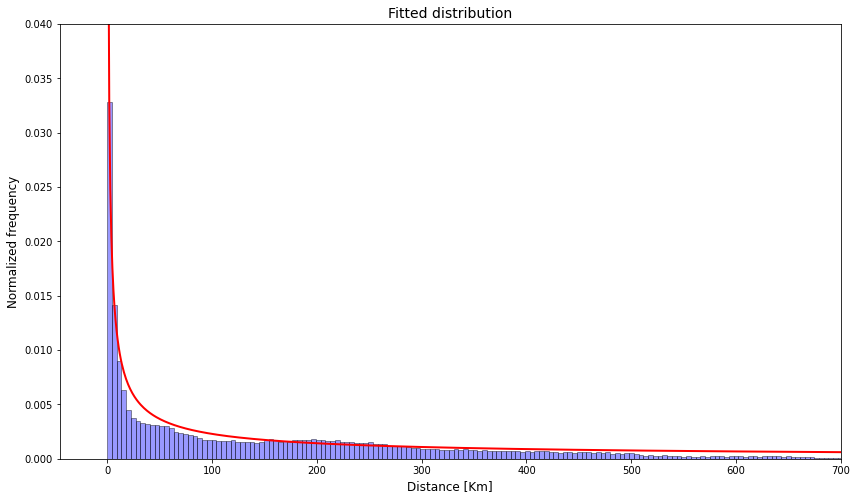

In [ ]:
m=2
  
# extract all the events of magnitude > mag
high_mag_earthqks = data.loc[data['MAGNITUDE']>m].loc[:,['X','Y','Z']].values.tolist()

# From meters to Km
high_mag_earthqks = [[x[0]/1000,x[1]/1000,x[2]/1000] for x in high_mag_earthqks]

# calculate distances for subsequent events
distances = [distance.euclidean(x[0],x[1]) for x in list(zip(high_mag_earthqks,high_mag_earthqks[1:]))]

# plot the histograms
plt.figure(figsize=(14,8))
h, bins, _ = plt.hist(distances, bins=200, density=True, cumulative=False, facecolor='b', edgecolor = "k", log=False, alpha=0.4, label='distances (m>2)') # create and plot the histogram
plt.title('Fitted distribution', fontsize = 14)
plt.xlabel('Distance [Km]', fontsize = 12)
plt.xticks([*list(np.arange(0,900,100))])
plt.xlim(right=700)
plt.ylim(0, 0.04)
plt.ylabel('Normalized frequency', fontsize = 12)

# plot the fitted line
def powerlaw(x, slope, intercept):
  return 10**intercept * x**slope

x = np.linspace(1,1000, 1000)

plt.plot(x, powerlaw(x, round(opt[1],2), round(opt[0],2)), color='r', linewidth=2, label='fitted curve')
fig.tight_layout()

# <center> 4 - Distribution of waiting time for events separated by a given distance $P_{m,R}(t)$

In this last part we add the distance constraint to the distribution of the wainting time previously computed. <br>
For each magnitude value, we compute three different distributions based on three different values of distance:
* R = average distance
* R = half the average distance
* R = double the average distance

### <center> Histogram visualization for consecutive events

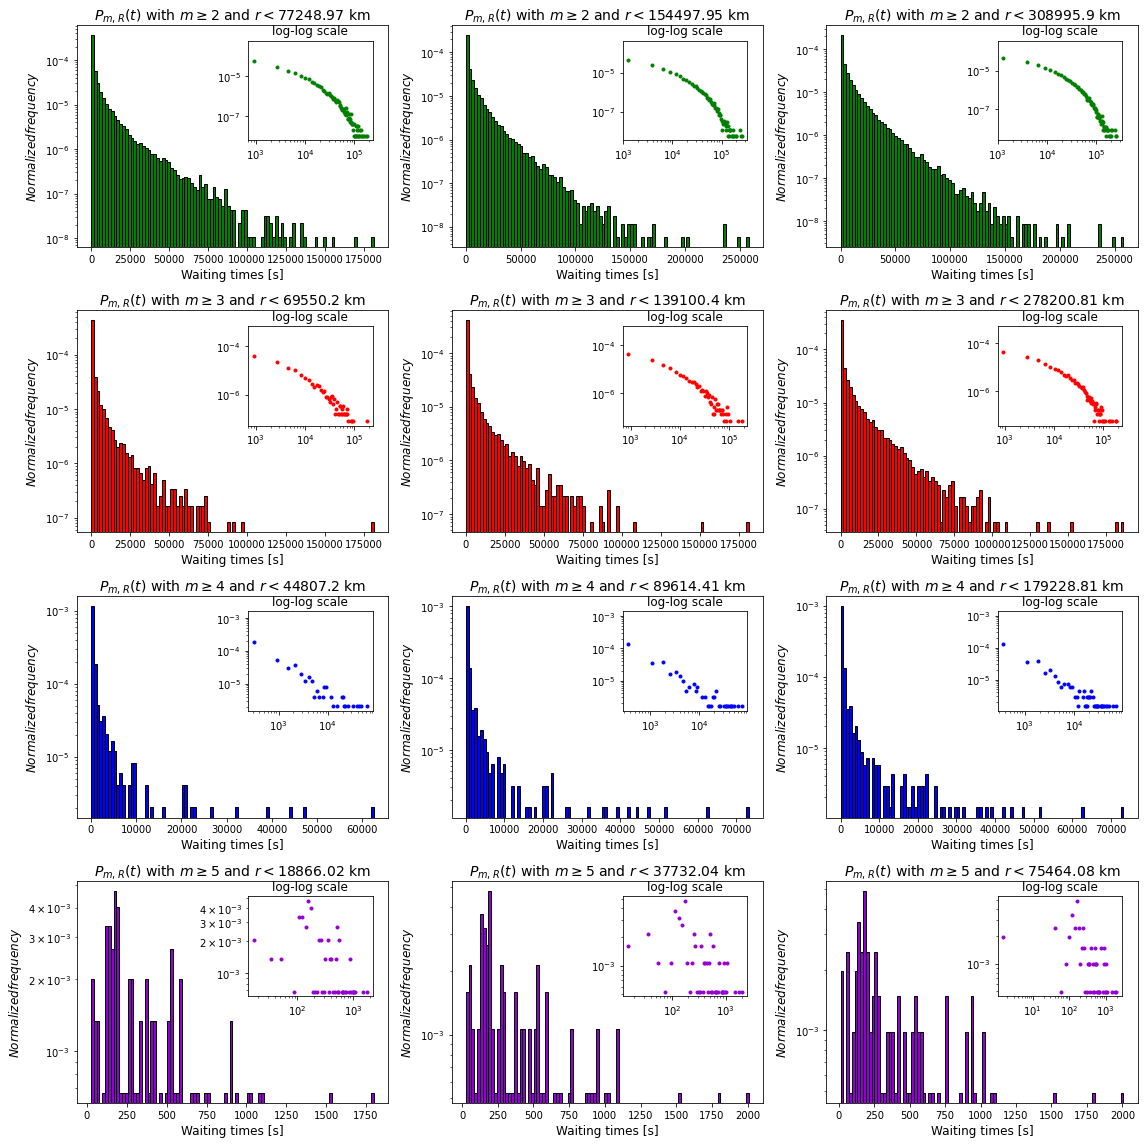

In [ ]:
data['inter_distance'] = np.sqrt((data['X'].diff(-1))**2 + (data['Y'].diff(-1))**2 + (data['Z'].diff(-1))**2)

colors = ['green', 'red', 'blue', 'darkviolet']

fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(16,16))

magnitudes = np.arange(2,6)
for mag in range(len(magnitudes)):

  # extract all the events of magnitude mag
  data_magm = data.loc[data['MAGNITUDE'] >= magnitudes[mag]] 
  
  #select the distances
  avg_R = data_magm['inter_distance'].mean()
  R = [avg_R/2, avg_R, avg_R*2]

  #plot the results
  for r in range(len(R)):
    data_magm_distr = data_magm.loc[data_magm['inter_distance'] < R[r]]
    max_inter_time = data_magm_distr['inter_time'].max()
    axe = sns.distplot(data_magm_distr['inter_time'], bins = 100, kde=False, norm_hist=True, ax=ax[mag,r], hist_kws={'color': colors[mag], 'alpha': 1, 'edgecolor' : 'black'})    
    ax[mag,r].set_title('$P_{m,R}(t)$ with $m \geq$' + str(magnitudes[mag]) + ' and $r<$' + str(round(R[r],2)) +' km', fontsize = 14)
    ax[mag,r].set_xlabel('Waiting times [s]', fontsize = 12)
    ax[mag,r].set_ylabel('$Normalized frequency$', fontsize = 12)
    ax[mag,r].set_yscale('log')

    edge = np.array([h.get_xy()[0] for h in axe.patches]) 
    edge_width = np.array([h.get_width() for h in axe.patches])      
    bin_centers =  np.array(np.add(edge, -edge_width/2.)) 
    freq =  np.array([h.get_height() for h in axe.patches])

    sub_axes = ax[mag,r].inset_axes([.55, .48, .40, .45]) 

    sub_axes.plot(bin_centers, freq,'.', color = colors[mag]) 
    sub_axes.set_xscale('log')
    sub_axes.set_yscale('log')
    sub_axes.set_title('log-log scale', fontsize = 12)
    fig.tight_layout()
    fig.show()

### <center> Histogram visualization for triggered events

In [ ]:
data_v1 = data.copy()
data_v1['inter_time'] = np.nan
data_v1['inter_distance'] = np.nan
for i in range(len(data_v1)):
  curr_row = data_v1.iloc[i]   # event of interest (EoI)
  curr_row_prev = int(curr_row['PREVIOUS'])  # look to what previous event causes the EoI
  if curr_row_prev != -1:  #if there is a previous event
    prev_row = data_v1.loc[data_v1['INDEX'] == curr_row_prev].squeeze()  # event which causes the EoI 
    points_dist = euc_dist(curr_row, prev_row)
    points_time = inter_time(prev_row, curr_row)
    data_v1.at[i, 'inter_time'] = points_time
    data_v1.at[i, 'inter_distance'] = points_dist
data_v1 = data_v1.dropna()

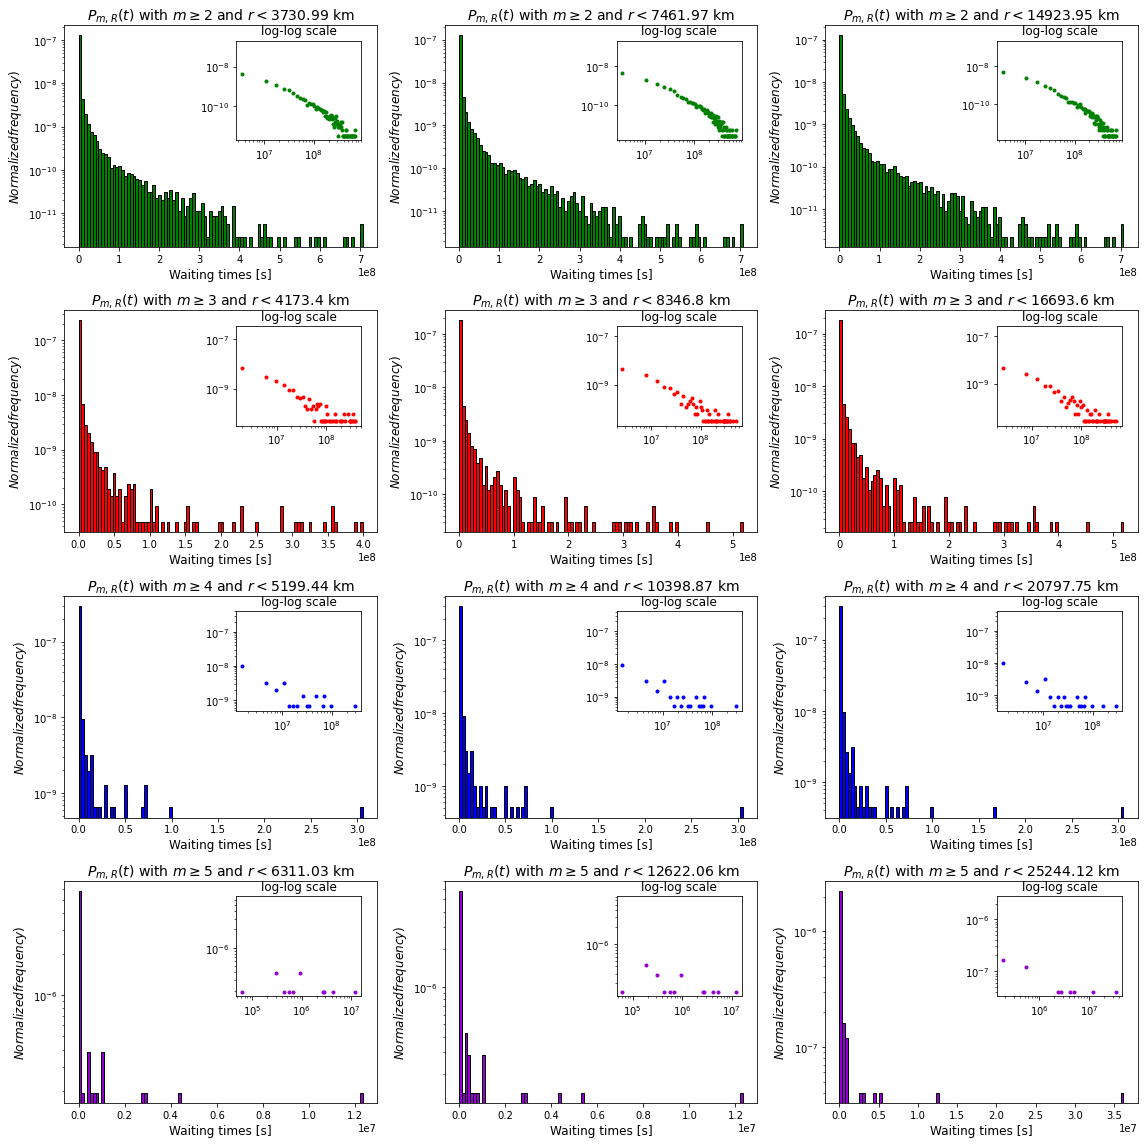

In [ ]:
colors = ['green', 'red', 'blue', 'darkviolet']

fig, ax = plt.subplots(nrows=4, ncols=3, figsize=(16,16))

magnitudes = np.arange(2,6)
for mag in range(len(magnitudes)):

  # extract all the events of magnitude mag
  data_magm = data_v1.loc[data['MAGNITUDE'] >= magnitudes[mag]] 
  
  #select the distances
  avg_R = data_magm['inter_distance'].mean()
  R = [avg_R/2, avg_R, avg_R*2]

  #plot the results
  for r in range(len(R)):
    data_magm_distr = data_magm.loc[data_magm['inter_distance'] < R[r]]
    max_inter_time = data_magm_distr['inter_time'].max()
    axe = sns.distplot(data_magm_distr['inter_time'], bins = 100, kde=False, norm_hist=True, ax=ax[mag,r], hist_kws={'color': colors[mag], 'alpha': 1, 'edgecolor' : 'black'})
    ax[mag,r].set_title('$P_{m,R}(t)$ with $m \geq$' + str(magnitudes[mag]) + ' and $r<$' + str(round(R[r],2)) +' km', fontsize = 14)
    ax[mag,r].set_xlabel('Waiting times [s]', fontsize = 12)
    ax[mag,r].set_ylabel('$Normalized frequency)$', fontsize = 12)
    ax[mag,r].set_yscale('log')
    
    edge = np.array([h.get_xy()[0] for h in axe.patches]) 
    edge_width = np.array([h.get_width() for h in axe.patches])      
    bin_centers =  np.array(np.add(edge, -edge_width/2.)) 
    freq =  np.array([h.get_height() for h in axe.patches])

    sub_axes = ax[mag,r].inset_axes([.55, .48, .40, .45]) 
    sub_axes.plot(bin_centers, freq,'.', color = colors[mag]) 
    sub_axes.set_xscale('log')
    sub_axes.set_yscale('log')
    sub_axes.set_title('log-log scale', fontsize = 12)
    fig.tight_layout()
    fig.show()

# <center> 5 - Rescaling

Power laws behave as a scale-free distribution, meaning that they preserve their shape when rescaled by a constant factor.

### <center> Rescaling $P_m(t)$

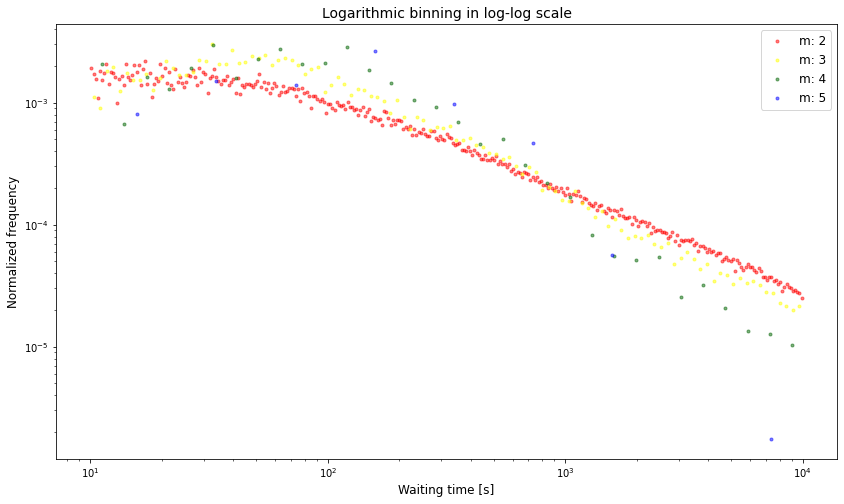

In [ ]:
#Analysis for different values of m
color = ['red','yellow','darkgreen','blue']
i = 0
fig, ax = plt.subplots(figsize = (14,8))

for mag in range(len(magnitudes)):

  # extract all the events of magnitude mag
  data_magm = data.loc[data['MAGNITUDE'] >= magnitudes[mag]] 

  hist, bin_edges = np.histogram(data_magm['inter_time'], bins = 10*np.logspace(0, 3, int(np.sqrt(data_magm.shape[0]))), density=True)
  bincenters = 0.5*(bin_edges[1:] + bin_edges[:-1])
  ax.plot(bincenters, hist, '.', label = 'm: '+str(magnitudes[mag]), color = color[i], alpha = 0.5)
  ax.set_xscale('log')
  ax.set_yscale('log')
  ax.set_title('Logarithmic binning in log-log scale', fontsize = 14)
  ax.set_xlabel('Waiting time [s]', fontsize = 12)
  ax.set_ylabel('Normalized frequency', fontsize = 12)

  ax.legend(fontsize = 12)
  i = i+1

### <center> Rescaling  $P_m(r)$

The following plot shows that the distributions for different *m* are well overlapped, meaning that the dataset structure behaviour is repeated for different values of m and it is not required do apply any rescaling

<Figure size 432x288 with 0 Axes>

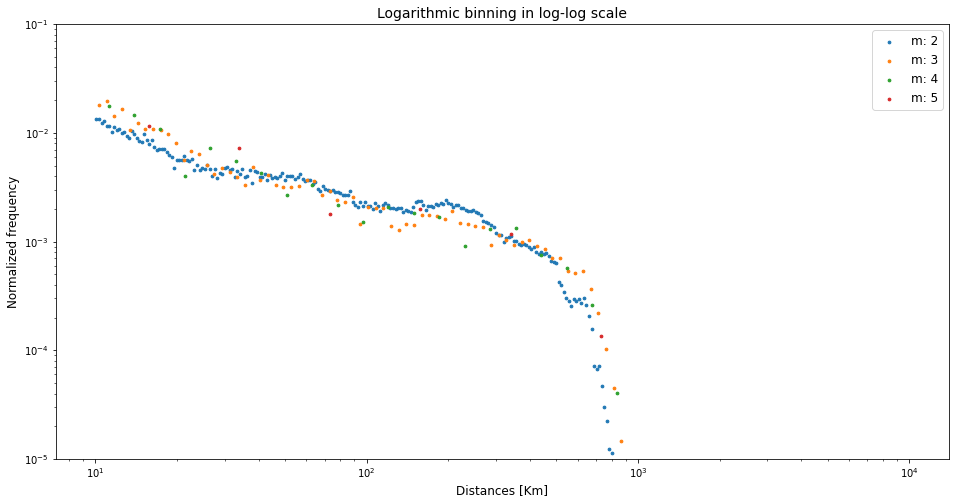

In [ ]:
# Extract the desired magnitude events and compute binning
heights=[]
centers=[]

for m in range(2,6):
  high_mag_earthqks = data.loc[data['MAGNITUDE']>m].loc[:,['X','Y','Z']].values.tolist()

  # convert from meters to Km
  high_mag_earthqks = [[x[0]/1000,x[1]/1000,x[2]/1000] for x in high_mag_earthqks]

  # calculate distances for subsequent events
  distances = [distance.euclidean(x[0],x[1]) for x in list(zip(high_mag_earthqks,high_mag_earthqks[1:]))]

  # compute the logarithmic binning
  h, bins, _ = plt.hist(distances, bins=10*np.logspace(0, 3, int(np.sqrt(len(distances)))), density=True, cumulative=False, log=False)  # bin_size = sqrt(N)  with  N = #events in the dataset
  plt.clf()
  heights.append(h)
  # compute centers of bins
  bin_ranges = list(zip(bins,bins[1:]))
  center = [x[1]-(x[1]-x[0])/2 for x in bin_ranges]
  centers.append(center)

# Plot binnings
fig, ax1 = plt.subplots(1, 1, figsize=(16, 8))
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(1e-5,1e-1)
ax1.set_title(f'Logarithmic binning in log-log scale', fontsize = 14)
ax1.set_xlabel('Distances [Km]', fontsize = 12)
ax1.set_ylabel('Normalized frequency', fontsize = 12)

for i in range(4):
  h = heights[i]
  center = centers[i]
  # plot histogram as points
  ax1.scatter(center, h, marker='.', label=f'm: {i+2}', s=30)

ax1.legend(fontsize = 12)

### <center> Rescaling $P_{m,R}(t)$

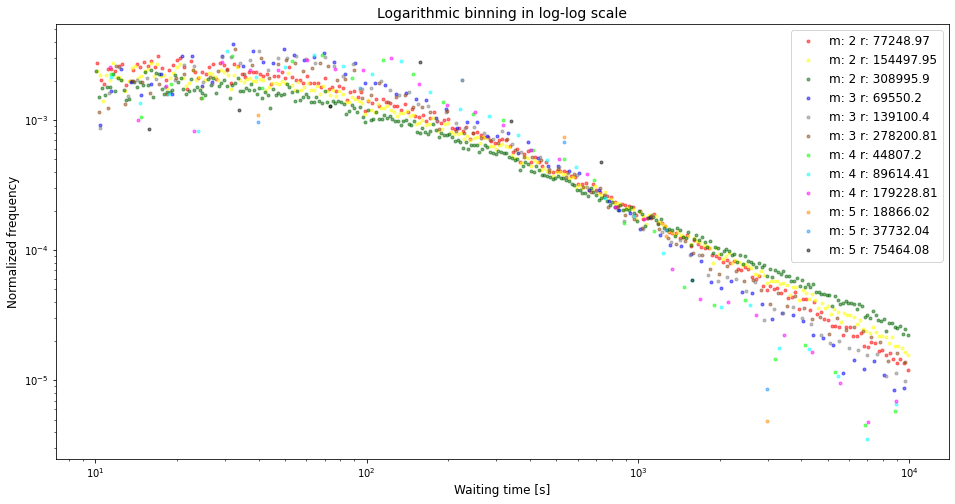

In [ ]:
color = ['red','yellow','darkgreen','blue','grey','saddlebrown','lime','aqua','magenta','darkorange',
         'dodgerblue','black']
i = 0
fig, ax = plt.subplots(figsize = (16,8))

for mag in range(len(magnitudes)):

  # extract all the events of magnitude mag
  data_magm = data.loc[data['MAGNITUDE'] >= magnitudes[mag]] 
  
  #select the distances
  avg_R = data_magm['inter_distance'].mean()
  R = [avg_R/2, avg_R, avg_R*2]

  #plot the results
  for r in range(len(R)):
    data_magm_distr = data_magm.loc[data_magm['inter_distance'] < R[r]]

    hist, bin_edges = np.histogram(data_magm_distr['inter_time'], bins = 10*np.logspace(0, 3, int(np.sqrt(data_magm_distr.shape[0]))), density=True)
    bincenters = 0.5*(bin_edges[1:] + bin_edges[:-1])
    ax.plot(bincenters, hist, '.', label = 'm: '+str(magnitudes[mag])+ ' r: '+str(round(R[r],2)), color = color[i], alpha = 0.5)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_title('Logarithmic binning in log-log scale', fontsize = 14)
    ax.set_xlabel('Waiting time [s]', fontsize = 12)
    ax.set_ylabel('Normalized frequency', fontsize = 12)

    ax.legend(fontsize = 12)
    i = i+1